In [77]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [78]:
def scatterplot(dat,x,y, color='blue'):
    """
    x: name of the first column
    y: name of the second column
    color: color of the dots (optional)
    """
    plt.scatter(dat[x], dat[y], color=color, label='Data Points')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(f'Scatter Plot for {x} and {y}')
    plt.show()    

def histogram(dat,x, color='blue', bins=None):
    """
    x: name of the  column
    color: color of the bins (optional)
    """
    plt.hist(dat[x], color=color, bins=bins)
    plt.xlabel(x)
    plt.ylabel('Frequency')
    plt.title(f'Histogram for {x}')
    plt.show() 

def evaluate_model(name, y_true, y_pred):
    print(f"\n{name} Model Performance:")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))

## Importing the dataset

In [79]:
names = ['id', 'ri', 'na', 'mg', 'al', 'si', 'k', 'ca', 'ba', 'fe', 'type']
types = {
    1: 'building_windows_float_processed',
    2: 'building_windows_non_float_processed',
    3: 'vehicle_windows_float_processed',
    4: 'vehicle_windows_non_float_processed',
    5: 'containers',
    6: 'tableware',
    7: 'headlamps'
}
dataset = pd.read_csv('../datasets/02_glass_identification/glass.data', names=names)
dataset

,id,ri,na,mg,al,si,k,ca,ba,fe,type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [80]:
dataset.drop(columns='id', inplace=True)

In [81]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ri      214 non-null    float64
 1   na      214 non-null    float64
 2   mg      214 non-null    float64
 3   al      214 non-null    float64
 4   si      214 non-null    float64
 5   k       214 non-null    float64
 6   ca      214 non-null    float64
 7   ba      214 non-null    float64
 8   fe      214 non-null    float64
 9   type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [82]:
dataset.describe()

,ri,na,mg,al,si,k,ca,ba,fe,type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


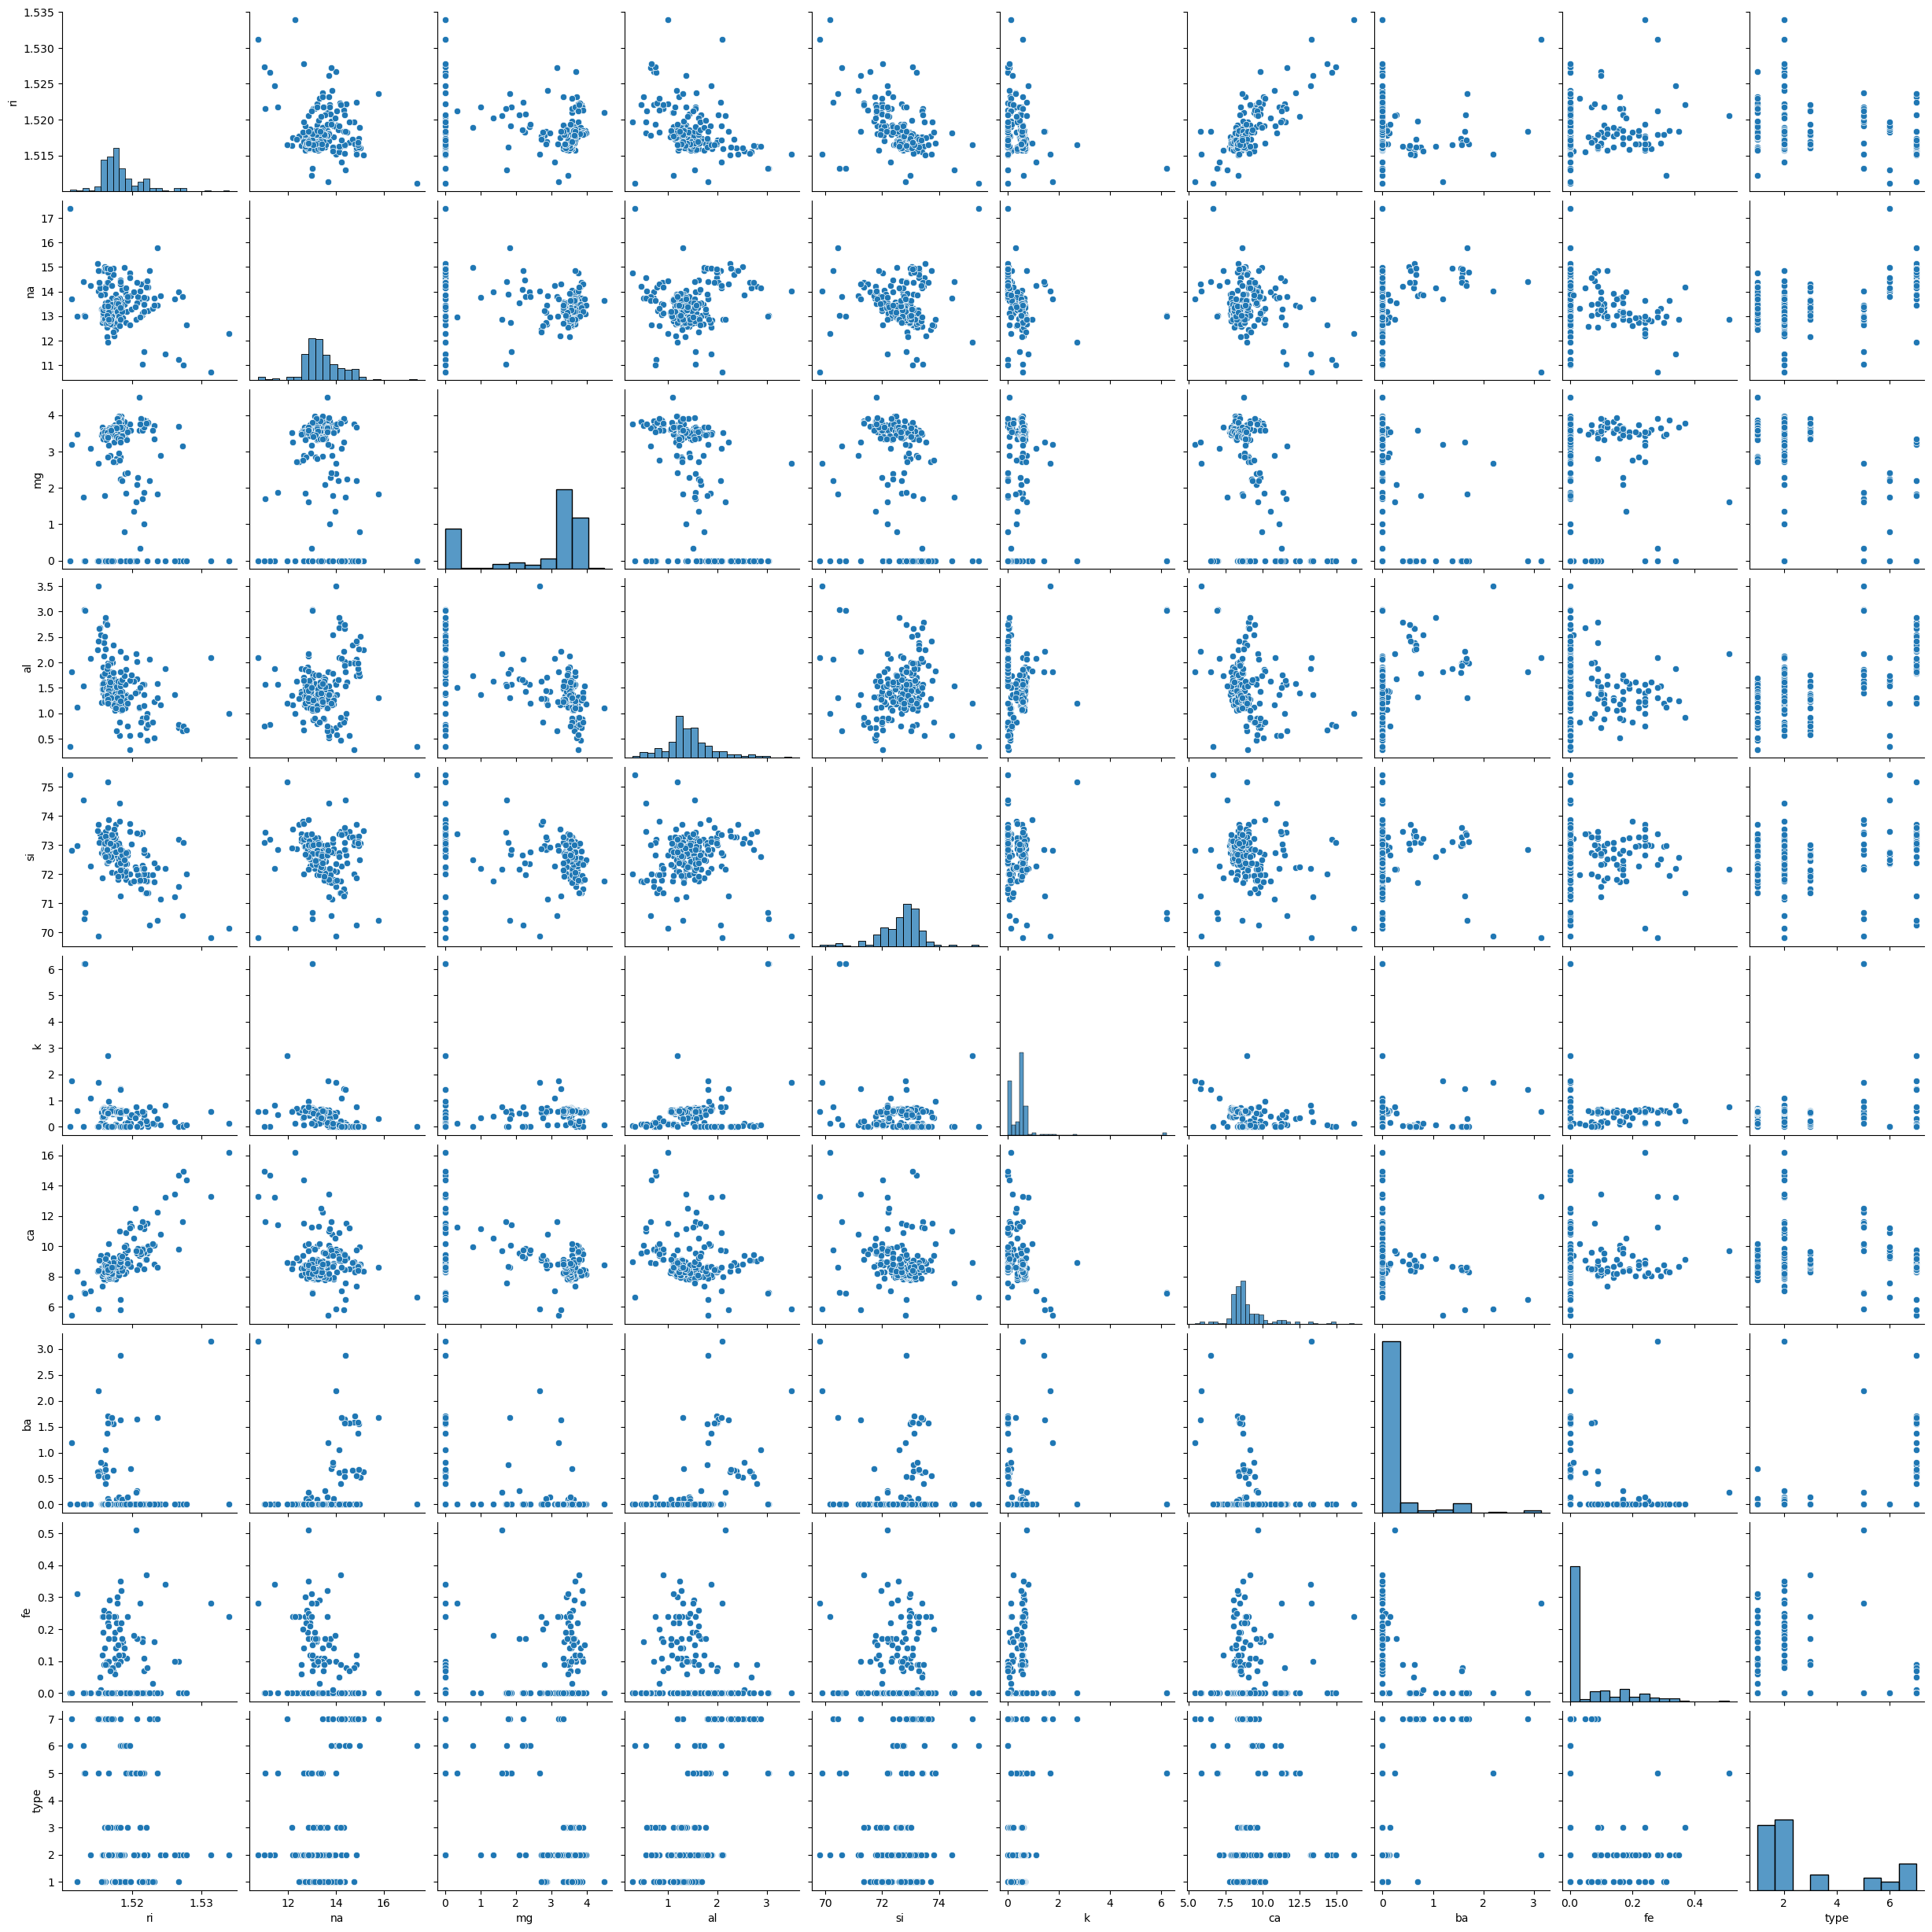

In [83]:
sns.pairplot(dataset)

In [84]:
# dataset.loc[dataset['mg'] == 0.0, 'mg'] = dataset['mg'].median()
# dataset.loc[dataset['k'] == 0.0, 'k'] = dataset['k'].mean()
# dataset.drop(columns=['ba', 'fe'], inplace=True)

## Splitting data

In [85]:
X,y = dataset.drop(columns='type'), dataset['type']

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [87]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Chosing the model

In [88]:
nb = GaussianNB()
lda = LinearDiscriminantAnalysis()
qda = QuadraticDiscriminantAnalysis()

In [89]:
nb.fit(X_train, y_train)

GaussianNB()

In [90]:
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [91]:
qda.fit(X_train, y_train)

/home/david/anaconda3/envs/env3.12/lib/python3.12/site-packages/sklearn/discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis()

In [92]:
y_pred_nb = nb.predict(X_test)

In [93]:
y_pred_lda = lda.predict(X_test)

In [94]:
y_pred_qda = qda.predict(X_test)

In [95]:
evaluate_model("Naïve Bayes", y_test, y_pred_nb)


Naïve Bayes Model Performance:
Accuracy: 0.5116279069767442
Classification Report:
               precision    recall  f1-score   support

           1       0.50      0.86      0.63        14
           2       0.40      0.13      0.20        15
           3       0.00      0.00      0.00         3
           5       0.50      0.33      0.40         3
           6       0.50      1.00      0.67         2
           7       0.83      0.83      0.83         6

    accuracy                           0.51        43
   macro avg       0.46      0.53      0.46        43
weighted avg       0.48      0.51      0.45        43

Confusion Matrix:
 [[12  1  1  0  0  0]
 [ 9  2  1  0  2  1]
 [ 3  0  0  0  0  0]
 [ 0  2  0  1  0  0]
 [ 0  0  0  0  2  0]
 [ 0  0  0  1  0  5]]


In [96]:
evaluate_model("LDA", y_test, y_pred_lda)


LDA Model Performance:
Accuracy: 0.6744186046511628
Classification Report:
               precision    recall  f1-score   support

           1       0.61      0.79      0.69        14
           2       0.77      0.67      0.71        15
           3       0.00      0.00      0.00         3
           5       0.67      0.67      0.67         3
           6       0.33      0.50      0.40         2
           7       1.00      0.83      0.91         6

    accuracy                           0.67        43
   macro avg       0.56      0.58      0.56        43
weighted avg       0.67      0.67      0.66        43

Confusion Matrix:
 [[11  2  1  0  0  0]
 [ 3 10  0  1  1  0]
 [ 3  0  0  0  0  0]
 [ 0  0  0  2  1  0]
 [ 0  1  0  0  1  0]
 [ 1  0  0  0  0  5]]


In [97]:
evaluate_model("QDA", y_test, y_pred_qda)


QDA Model Performance:
Accuracy: 0.6511627906976745
Classification Report:
               precision    recall  f1-score   support

           1       0.60      0.86      0.71        14
           2       0.60      0.40      0.48        15
           3       0.00      0.00      0.00         3
           5       1.00      0.67      0.80         3
           6       0.67      1.00      0.80         2
           7       0.86      1.00      0.92         6

    accuracy                           0.65        43
   macro avg       0.62      0.65      0.62        43
weighted avg       0.63      0.65      0.62        43

Confusion Matrix:
 [[12  2  0  0  0  0]
 [ 6  6  1  0  1  1]
 [ 2  1  0  0  0  0]
 [ 0  1  0  2  0  0]
 [ 0  0  0  0  2  0]
 [ 0  0  0  0  0  6]]
